# Spoken Digits Recognition

Term project for Machine Learning UoT course

The objective of this Notebook is to predict spoken English digits using a Keras model.

This Notebook has three main sections.
1. Extract the features of the WAV files, save them into CSV files and store them into Pandas
2. The model will be trained based on the data set created by https://github.com/Jakobovski/free-spoken-digit-dataset
3. The model will be re-trained based on the previous data plus the recordings made by Ankor (Indian accent), Caroline (Canadian female child accent) and Rodolfo (Brazilian accent)

## Section 1

The output of this section is the CSV files with the data to be handle by the model

```
trainData     : ../data/recordings/train 
testData      : ../data/recordings/test
moreTrainData : ../data/recordings/moreSpeakersTrain
moreTestData  : ../data/recordings/moreSpeakersTest
```


In [53]:
# If true, the WAV files will be read and their features will be saved in the CSV files
# As this is the most time consuming task, only enable it if you don't have the CSV files yet
CREATE_CSV_FILES = True

In [54]:
# Defines the names of the CSV files
TRAIN_CSV_FILE = "train_dima_tema.csv"
TEST_CSV_FILE = "test_dima_tema.csv"
MORE_TRAIN_CSV_FILE = "more_train.csv"
MORE_TEST_CSV_FILE = "more_test.csv"

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("../data/recordings/train_dima_tema", TRAIN_CSV_FILE)
    extractWavFeatures("../data/recordings/test_dima_tema", TEST_CSV_FILE)
    extractWavFeatures("../data/recordings/moreSpeakersTrain", MORE_TRAIN_CSV_FILE)
    extractWavFeatures("../data/recordings/moreSpeakersTest", MORE_TEST_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder ../data/recordings/train_dima_tema will be saved to train_dima_tema.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder ../data/recordings/test_dima_tema will be saved to test_dima_tema.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder ../data/recordings/moreSpeakersTrain

In [77]:
#Reading a dataset and convert file name to corresponding number

import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    data['number'] = data['filename'].str[:1].astype('float32')
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)
moreTrainData = preProcessData(MORE_TRAIN_CSV_FILE)
moreTestData = preProcessData(MORE_TEST_CSV_FILE)

train_dima_tema.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0  0.111888         729.651442          747.317815  1408.886719   
1  0.089477         634.814929          680.864111  1150.153915   
2  0.090830         655.621966          718.653233  1181.813965   
3  0.087415         710.685129          734.039835  1450.301107   
4  0.096261         851.433620          788.105787  1546.177607   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0            0.033465 -297.760559  190.904816 -18.628477   3.553748   
1            0.033458 -341.170197  204.418350  -6.565163  12.426304   
2            0.033008 -329.472778  196.824692  -3.499283  18.130342   
3            0.035626 -322.623840  201.328583  -7.373237   9.652830   
4            0.048191 -318.701569  195.884232 -12.353911   1.126135   

       mfcc5  ...     mfcc12    mfcc13    mfcc14     mfcc15    mfcc16  \
0  23.493822  ... -26.396330 -

## Section 2

There are 50 recordings for each digit for each speaker: Jackson, Nicolas and Theo (total 1500 recordings)

Training data has 49 recordings for each digit for each speaker: 1470 recordings total.
Test data has 1 recordings for each digit for each speaker: 30 recordings total.

The data used here comes from the recordings stored in:
* ../data/recordings/train
* ../data/recordings/test

The model will be trained to predict the spoken digit.

In [78]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)

Y from training data: (1029,)
Y from validation data: (441,)
Y from test data: (30,)


In [79]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

X from training data (1029, 25)
X from validation data (441, 25)
X from test data (30, 25)


In [59]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128)

Epoch 1/50
9/9 [==============================] - 2s 54ms/step - loss: 2.4077 - accuracy: 0.1263 - val_loss: 2.0780 - val_accuracy: 0.4694
Epoch 2/50
9/9 [==============================] - 0s 15ms/step - loss: 2.1097 - accuracy: 0.2391 - val_loss: 1.9308 - val_accuracy: 0.5692
Epoch 3/50
9/9 [==============================] - 0s 16ms/step - loss: 2.0024 - accuracy: 0.2692 - val_loss: 1.7943 - val_accuracy: 0.5782
Epoch 4/50
9/9 [==============================] - 0s 14ms/step - loss: 1.8507 - accuracy: 0.3333 - val_loss: 1.6644 - val_accuracy: 0.5782
Epoch 5/50
9/9 [==============================] - 0s 14ms/step - loss: 1.6871 - accuracy: 0.4023 - val_loss: 1.5194 - val_accuracy: 0.5692
Epoch 6/50
9/9 [==============================] - 0s 15ms/step - loss: 1.6180 - accuracy: 0.4315 - val_loss: 1.3665 - val_accuracy: 0.6145
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 1.4996 - accuracy: 0.4898 - val_loss: 1.2132 - val_accuracy: 0.6757
Epoch 8/50
9/9 [===========

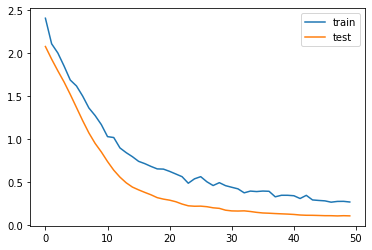

In [60]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Auxiliary functions to show the results

In [74]:
def printPrediction(X_data, y_data):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        prediction = np.argmax(model.predict(X_data[i:i+1]), axis=-1)
        print("y={}, prediction={}, match={}".format(y_data[i], prediction, y_data[i]==str(prediction[0])))

In [81]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    #Confution Matrix and Classification Report
    Y_pred = np.argmax(model.predict(X_data), axis=-1)
    y_test_num = y_data.astype(np.int64)
    print('Confusion Matrix')
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    
    print('\nClassification Report')
    target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    print(classification_report(y_test_num, Y_pred, target_names=target_names))

### Present the model performance

In [85]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10])


# TEST DATA #

1/1 [==============================] - 0s 58ms/step - loss: 0.1656 - accuracy: 0.9333
accuracy: 93.33%

# Generate predictions
1/1 [==============================] - 0s 50ms/step
y=0.0, prediction=[0], match=False
1/1 [==============================] - 0s 56ms/step
y=0.0, prediction=[3], match=False
1/1 [==============================] - 0s 49ms/step
y=0.0, prediction=[0], match=False
1/1 [==============================] - 0s 57ms/step
y=1.0, prediction=[1], match=False
1/1 [==============================] - 0s 58ms/step
y=1.0, prediction=[1], match=False
1/1 [==============================] - 0s 48ms/step
y=1.0, prediction=[1], match=False
1/1 [==============================] - 0s 57ms/step
y=2.0, prediction=[2], match=False
1/1 [==============================] - 0s 48ms/step
y=2.0, prediction=[2], match=False
1/1 [==============================] - 0s 56ms/step
y=2.0, prediction=[3], match=False
1/1 [==============================] - 0s 56ms/step
y=3.0, prediction=[3],

Classification Report for Test Data

1/1 [==============================] - 0s 65ms/step
Confusion Matrix
[[2 0 0 1 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 3]]


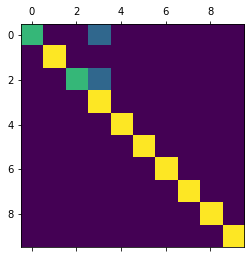


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       0.60      1.00      0.75         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.93        30
weighted avg       0.96      0.93      0.94        30



In [82]:
print("Classification Report for Test Data\n")
report(X_test, y_test)


## Section 3

There are 50 recordings for each digit for each speaker: Jackson, Nicolas and Theo (total 1500 recordings)
Training data has 49 recordings for each digit for each speaker: 1470 recordings total.
Test data has 1 recordings for each digit for each speaker: 30 recordings total.

In addition, there are 2 recordings for each digit for each speaker: Ankur, Caroline and Rodolfo (total 60 recordings)
This addition training data has 1 recordings for each digit for each speaker: 30 recordings total.
This addition test data has 1 recordings for each digit for each speaker: 30 recordings total.

Therefore the full data set has:
* Training: 1500 recordings
* Training: 60 recordings

The data used here comes from the recordings stored in:
* ../data/recordings/train
* ../data/recordings/test
* ../data/recordings/moreSpeakersTrain
* ../data/recordings/moreSpeakersTest

In [83]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split

fullTrainData = trainData.append(moreTrainData)

X = np.array(fullTrainData.iloc[:, :-1], dtype = float)
y = fullTrainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

X_more_test = np.array(moreTestData.iloc[:, :-1], dtype = float)
y_more_test = moreTestData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)
print("Y from other speakers test data:", y_more_test.shape)


Y from training data: (1050,)
Y from validation data: (450,)
Y from test data: (30,)
Y from other speakers test data: (30,)


C:\Users\seeyo\AppData\Local\Temp\ipykernel_13232\1552578682.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fullTrainData = trainData.append(moreTrainData)


In [84]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )
X_more_test = scaler.transform( X_more_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)
print("X from other speakers test data", X_more_test.shape)


X from training data (1050, 25)
X from validation data (450, 25)
X from test data (30, 25)
X from other speakers test data (30, 25)


In [18]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    callbacks=[es])

Epoch 1/50


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 400, in dispatch_shell
      await result
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\seeyo\AppData\Local\Temp\ipykernel_17136\711578335.py", line 27, in <cell line: 27>
      history = model.fit(X_train,
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 998, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "c:\Users\seeyo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 685, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_1733]

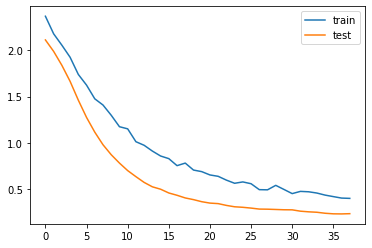

In [16]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Present the model performance

In [17]:
print('\n# TEST DATA #\n')
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_test[0:10], y_test[0:10])


# TEST DATA #

30/30 [==============================] - 0s 33us/step
accuracy: 90.00%

# Generate predictions
y=0, prediction=[0], match=True
y=0, prediction=[3], match=False
y=0, prediction=[0], match=True
y=1, prediction=[1], match=True
y=1, prediction=[4], match=False
y=1, prediction=[1], match=True
y=2, prediction=[2], match=True
y=2, prediction=[2], match=True
y=2, prediction=[3], match=False
y=3, prediction=[3], match=True


In [18]:
print('\n# OTHER SPEAKERS DATA #\n')
score = model.evaluate(X_more_test, y_more_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# Prediction
printPrediction(X_more_test[0:10], y_more_test[0:10])



# OTHER SPEAKERS DATA #

30/30 [==============================] - 0s 67us/step
accuracy: 26.67%

# Generate predictions
y=0, prediction=[3], match=False
y=0, prediction=[0], match=True
y=0, prediction=[1], match=False
y=1, prediction=[0], match=False
y=1, prediction=[9], match=False
y=1, prediction=[9], match=False
y=2, prediction=[2], match=True
y=2, prediction=[8], match=False
y=2, prediction=[6], match=False
y=3, prediction=[3], match=True


Classification Report for Test Data

Confusion Matrix
[[2 0 0 1 0 0 0 0 0 0]
 [0 2 0 0 1 0 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 3]]


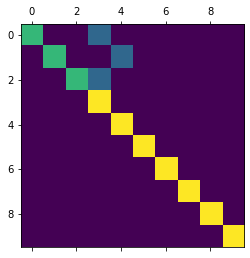


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         3
           2       1.00      0.67      0.80         3
           3       0.60      1.00      0.75         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3

    accuracy                           0.90        30
   macro avg       0.93      0.90      0.90        30
weighted avg       0.94      0.90      0.90        30

Classification Report for Other Speakers

Confusion Matrix
[[1 1 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 2]
 [0 0 1 0 0 0 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 1 0 0 0 1 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 2 0 1 0

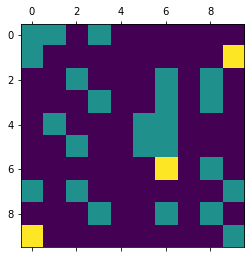


Classification Report
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.00      0.00      0.00         3
           2       0.33      0.33      0.33         3
           3       0.33      0.33      0.33         3
           4       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.29      0.67      0.40         3
           7       0.00      0.00      0.00         3
           8       0.25      0.33      0.29         3
           9       0.25      0.33      0.29         3

    accuracy                           0.27        30
   macro avg       0.22      0.27      0.23        30
weighted avg       0.22      0.27      0.23        30



c:\users\erodvas\env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
print("Classification Report for Test Data\n")
report(X_test, y_test)

print("Classification Report for Other Speakers\n")
report(X_more_test, y_more_test)
